# Regression

In  a regression problem, we  try to fit a line:

$$Y = v_0 + v_1 * X + \epsilon$$

We will try to adjust the intercept ($v_0$) and the slope ($v_1$) parameters of the line so that the sum of the distances of all points from the line becomes minimal.

We create a loss function that minimizes the difference between observed and predicted values, as a function of adjusting the line:

$$Loss = \frac{1}{2} \sum (Y - \hat{Y})^2$$
$$Loss = \frac{1}{2} \sum (Y - v_0 + v_1 * X)^2$$




In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression


1. Generate some data and plot them.

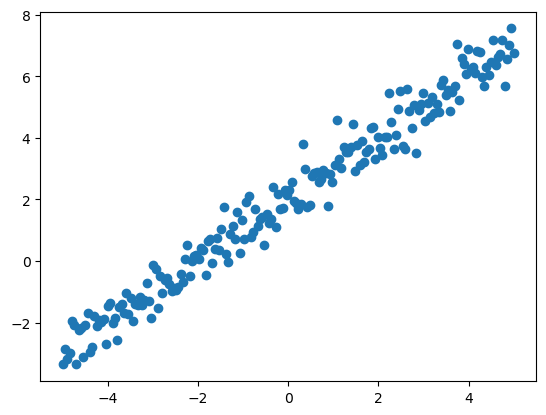

In [45]:
nb_samples = 200

# Generate data
X = np.linspace(-5, 5, nb_samples)  # Ensure exactly 200 points
Y = X + 2 + np.random.normal(0.0, 0.5, size=nb_samples)

# Plot data
plt.scatter(X, Y)
plt.show()


In [46]:
# functions
def loss(v):
    """_summary_

    Args:
        v (np_array): numpy array containing fitted parameters 

    Returns:
        scalar: summed loss
    """
    e = 0.0
    for i in range(nb_samples):
        e += np.square(v[0] + v[1] * X[i] - Y[i])
    return 0.5 * e
    
    
def gradient(v):
    g = np.zeros(shape=2)
    for i in range(nb_samples):
        g[0] += (v[0] + v[1] * X[i] - Y[i]) # partial derivative of loss with respect to v[0]
        g[1] += (v[0] + v[1] * X[i] - Y[i]) * X[i] # partial derivative of loss with respect to v[1]
    return g




In [47]:
result=minimize(fun=loss, x0=[0.0, 0.0], jac=gradient, method='Powell')
print(result)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 24.95323573366616
       x: [ 2.032e+00  9.952e-01]
     nit: 3
   direc: [[ 1.000e+00  0.000e+00]
           [ 0.000e+00  1.000e+00]]
    nfev: 86


/Users/johannabayer/anaconda3/envs/ML_env/lib/python3.11/site-packages/scipy/optimize/_minimize.py:560: RuntimeWarning: Method Powell does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


### Let's do the same with scikit learn

We need to first reshape X

In [ ]:
X.shape
Y.shape

X= X.reshape(-1,1)
X.shape

In [49]:
reg = LinearRegression().fit(X, Y)
reg.score(X, Y)

0.9709371830003748

In [50]:
print(reg.coef_)
print(reg.intercept_)

[0.99519751]
2.032497145633973



# Ridge regression (L1 regression) , Lasso regression (L2 regression), and Elastic Net

Simple regression can be prone to over fitting. This is why we add a regularisation parameter alpha that "reverses" the tightening of the fit. Adding $\alpha$ will also allow us to identify which predictors are relevant for multiple linear regression.

Again, we are trying to fit the line:

$$Y = v_0 + v_1 * X_1 + v_1 * X_2 ... + \epsilon$$

$$Y = v_0 + v * X + \epsilon$$

#### L1 Regression:

$$Loss = \frac{1}{n} \sum (Y - \widehat{Y}) + \lambda \sum_1^n |v_i|$$

$$Loss = \frac{1}{n} \sum (Y - v_0 + v * X) + \lambda \sum_1^n |v_i|$$

#### L2 Regression:

$$Loss = \frac{1}{n} \sum (Y - \widehat{Y}) +  \lambda \sum_1^n v_i^{2}$$

$$Loss = \frac{1}{n} \sum (Y - v_0 + v * X) +  \lambda \sum_1^n v_i^{2}$$

### Elastic net

Elastic nets are a trade off between ridge and lasso regression. An additional toggle parameter $\rho$ is being used to toggle between ridge and lasso regression.

$$Loss = \frac{1}{n} \sum (Y - v_0 + v * X) +  \alpha * ( \rho \sum_1^n |v_i| + (1-\rho) \sum_1^n v_i^{2})$$

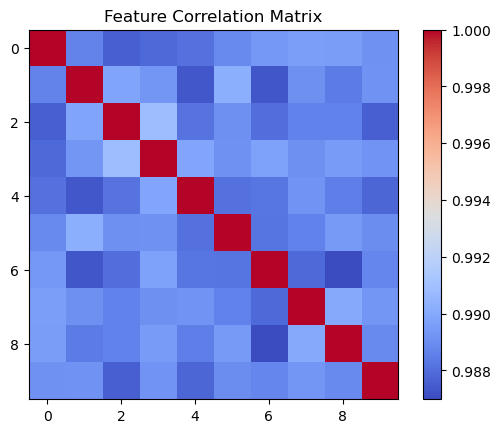

L1 Regression Result Coefficients: [ 9.71634607e-01 -7.26680967e-01  1.93084142e+00  3.39217596e-12
  2.11405415e-01  3.24240949e-12  1.07202636e-02 -1.33974990e-09
  2.26291584e-03  1.49182242e-01]
L2 Regression Result Coefficients: [ 0.7559045  -0.85129315  1.27385978  0.12414458  0.31584347  0.00414326
  0.26142851  0.12972388  0.30222298  0.2423543 ]
Elastic Net Regression Result Coefficients: [ 8.28128716e-01 -8.34149177e-01  1.59129643e+00  2.32261326e-10
  3.69882644e-01 -9.21976505e-13  2.24251574e-01  7.92474709e-02
  2.40481786e-02  2.75442322e-01]


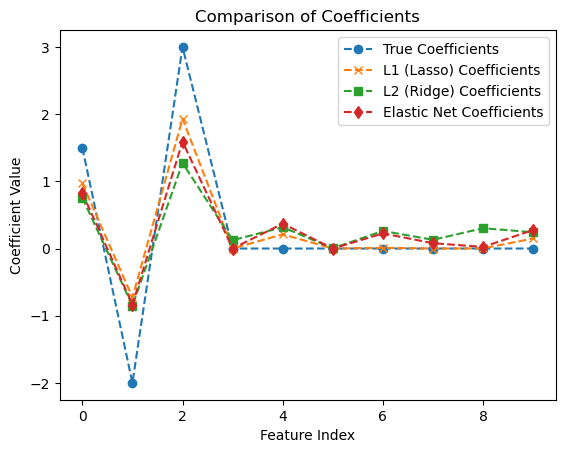

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Number of samples and features
nb_samples = 200
nb_features = 10

# Generate synthetic data with correlated features
np.random.seed(42)  # For reproducibility
X_base = np.random.randn(nb_samples, 1)
X = np.hstack([X_base + 0.1 * np.random.randn(nb_samples, 1) for _ in range(nb_features)])

# True coefficients, only a few are non-zero (sparse)
true_coefficients = np.zeros(nb_features)
true_coefficients[:3] = [1.5, -2.0, 3.0]  # Only the first three features are relevant

# Generate target variable with some noise: @ means dot product
Y = X @ true_coefficients + np.random.normal(0.0, 0.5, size=nb_samples)

# Plotting the correlation matrix to show multicollinearity
plt.imshow(np.corrcoef(X, rowvar=False), cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title("Feature Correlation Matrix")
plt.show()

# L1 (Lasso) Loss function
def loss_l1(v, alpha=1.0):
    """Calculate the L1 loss for linear regression with regularization."""
    e = 0.0
    for i in range(nb_samples):
        e += np.square(np.dot(X[i], v) - Y[i])
    # L1 regularization term
    l1_penalty = alpha * np.sum(np.abs(v))
    return 0.5 * e + l1_penalty

# L2 (Ridge) Loss function
def loss_l2(v, alpha=1.0):
    """Calculate the L2 loss for linear regression with regularization."""
    e = 0.0
    for i in range(nb_samples):
        e += np.square(np.dot(X[i], v) - Y[i])
    # L2 regularization term
    l2_penalty = alpha * np.sum(v**2)
    return 0.5 * e + l2_penalty

# Elastic Net Loss function
def loss_elastic_net(v, alpha=1.0, l1_ratio=0.5):
    """Calculate the elastic net loss for linear regression with regularization."""
    e = 0.0
    for i in range(nb_samples):
        e += np.square(np.dot(X[i], v) - Y[i])
    # Elastic net regularization term
    l1_penalty = l1_ratio * np.sum(np.abs(v))
    l2_penalty = (1 - l1_ratio) * np.sum(v**2)
    elastic_penalty = alpha * (l1_penalty + l2_penalty)
    return 0.5 * e + elastic_penalty

# Perform optimization for L1
result_l1 = minimize(fun=loss_l1, x0=np.zeros(nb_features), method='Powell')
print("L1 Regression Result Coefficients:", result_l1.x)

# Perform optimization for L2
result_l2 = minimize(fun=loss_l2, x0=np.zeros(nb_features), method='Powell')
print("L2 Regression Result Coefficients:", result_l2.x)

# Perform optimization for Elastic Net
result_elastic_net = minimize(fun=loss_elastic_net, x0=np.zeros(nb_features), method='Powell')
print("Elastic Net Regression Result Coefficients:", result_elastic_net.x)

# Plotting the results
plt.plot(true_coefficients, label='True Coefficients', linestyle='--', marker='o')
plt.plot(result_l1.x, label='L1 (Lasso) Coefficients', linestyle='--', marker='x')
plt.plot(result_l2.x, label='L2 (Ridge) Coefficients', linestyle='--', marker='s')
plt.plot(result_elastic_net.x, label='Elastic Net Coefficients', linestyle='--', marker='d')
plt.title("Comparison of Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.show()


### Let's do the same with sklearn

Lasso (L1) Regression Coefficients: [0.39867138 0.         1.03804908 0.         0.         0.
 0.         0.         0.         0.        ]
Ridge (L2) Regression Coefficients: [ 1.05345191 -1.34896659  1.78742646  0.03674221  0.28444132 -0.084164
  0.17050839  0.0756038   0.26542667  0.30511646]
Elastic Net Regression Coefficients: [0.22668092 0.13386025 0.24268405 0.18704842 0.18485964 0.17734042
 0.1915859  0.16983402 0.19162991 0.19242394]


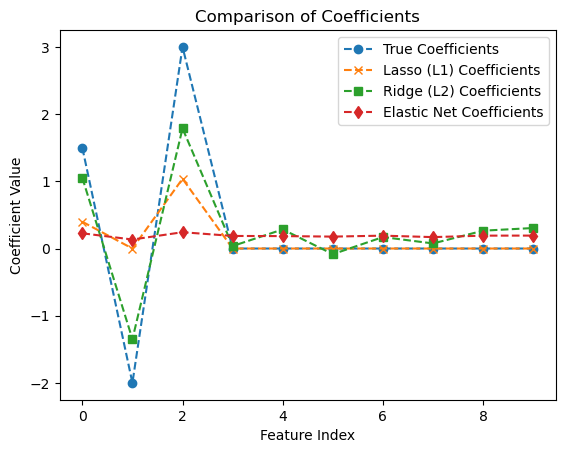

In [58]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# Lasso (L1 regularization)
lasso = Lasso(alpha=1.0, max_iter=10000)
lasso.fit(X, Y)
print("Lasso (L1) Regression Coefficients:", lasso.coef_)

# Ridge (L2 regularization)
ridge = Ridge(alpha=1.0)
ridge.fit(X, Y)
print("Ridge (L2) Regression Coefficients:", ridge.coef_)

# Elastic Net (combined L1 and L2 regularization)
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=10000)
elastic_net.fit(X, Y)
print("Elastic Net Regression Coefficients:", elastic_net.coef_)

# Plotting the results
plt.plot(true_coefficients, label='True Coefficients', linestyle='--', marker='o')
plt.plot(lasso.coef_, label='Lasso (L1) Coefficients', linestyle='--', marker='x')
plt.plot(ridge.coef_, label='Ridge (L2) Coefficients', linestyle='--', marker='s')
plt.plot(elastic_net.coef_, label='Elastic Net Coefficients', linestyle='--', marker='d')
plt.title("Comparison of Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.show()